---
# Matplotlib Overview
---

## Introduction

**Matplotlib** is a Python library for **data visualization** (2D/3D graphics), which can ***replicate*** MatLab's plotting capabilities. 

Some of the major features of Matplotlib are:
* Easy to get started for simple plots
* Very customizable in general (labels and texts)
* Great control of every element in figures
* High-quality output in many formats

> Matplotlib allows us to create reproducible figures **programmatically**.

# Importing Matplotlib
Import the `Matplotlib pyplot` module under the name `plt`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline    

That line is only for jupyter notebooks, if you are using another editor, you'll use **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example
Let's walk through a very simple example using two **`Numpy arrays`**.
+ We can also use **`Python Lists`**, but most likely we'll be passing **`Numpy arrays`** or **`Pandas series`**.

In [2]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [3]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [4]:
y

array([  0.  ,   0.25,   1.  ,   2.25,   4.  ,   6.25,   9.  ,  12.25,
        16.  ,  20.25,  25.  ])

> **Notice that there is a functional relationship between `x` and `y`** $$y = f(x)$$

---
# Basic Matplotlib Commands
---
We can create a very simple **line plot** using `matplotlib.pyplot` (`plt`)

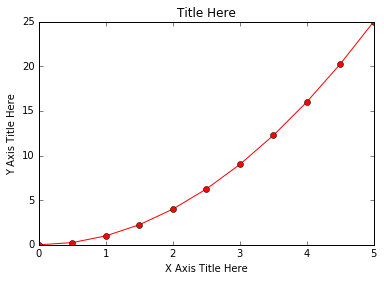

In [5]:
plt.plot(x, y, 'ro-') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('Title Here')
plt.show()

---
# Creating Multiplots on same canvas
---

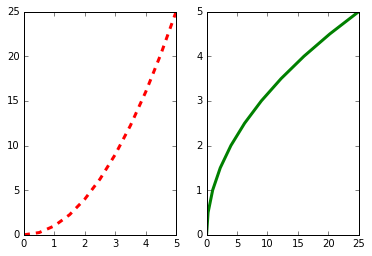

In [6]:
# Creating a figure with subplots
plt.subplots(nrows=1, ncols=2)

# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--', lw=3) 

plt.subplot(1,2,2)
plt.plot(y, x, 'g-', lw=3)

plt.show()

> A good practice to avoid blind color issues, is to combine different line types, markers, and grayscale. 

---
# Matplotlib Object Oriented Method
---

### Introduction to the Object Oriented Method
Up to now, we've seen the very basics of using `Matplotlib`. Let's review a more formal introduction of Matplotlib's **Object Oriented API**. 

+ We can *instantiate* `Figure` objects and *call* methods or *get* attributes from those objects.
+ This approach is very convenient when dealing with canvas having multiple plots. 

#### To begin, we create a figure instance... then, we can add axes to that figure instance

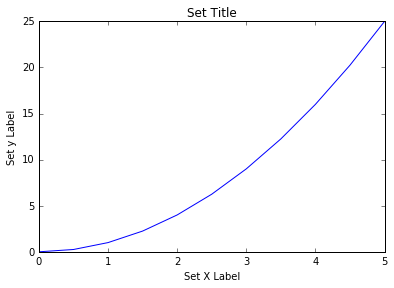

In [7]:
# Create Figure (empty canvas)
fig = plt.figure()  # <class 'matplotlib.figure.Figure'>

# Add set of axes to figure
rect = [0.1, 0.1, 0.8, 0.8] # [left, bottom, width, height] 
axes = fig.add_axes(rect)   # range(0,1)  in fractions of figure 

# Plot on that set of axes
axes.plot(x, y, 'b')

# Notice the use of "Setters" (OOP)
axes.set_xlabel('Set X Label') 
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

plt.show() # Display

With Matplotlib **Object Oriented API**, code may be more complicated 
+ but we get full control of where the plot axes are placed
+ we can easily add more than one axis to the figure

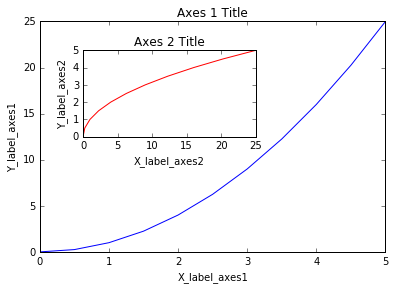

In [8]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');


# Subplots()

The `plt.subplots()` object will act as a more automatic axis manager.

Basic use cases:

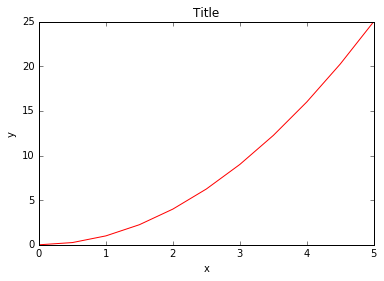

In [9]:
# Use similar to plt.figure() 
# except use "tuple unpacking" to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')

# Now use setters for customization
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Title');

Then you can specify the number of rows and columns when creating the subplots() object:

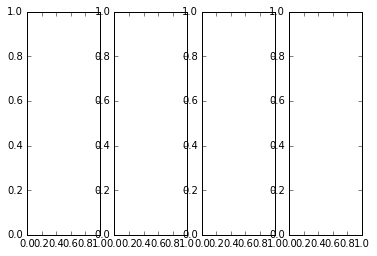

In [10]:
# Empty canvas of 1 by 4 subplots
fig, axes = plt.subplots(nrows=1, ncols=4)

In [11]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f82e46fc710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f82e46047b8>], dtype=object)

We can iterate through this array:

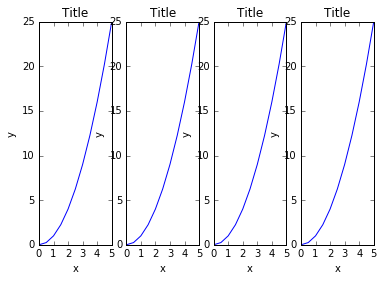

In [12]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Title')

# Display the figure object    
fig

A common issue with `Matplolib subplots` is **figures overlapping** 
+ We ca use **`tight_layout()`** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

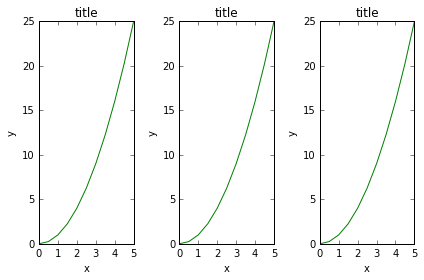

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Automatically adjusts the positions of the axes 
fig.tight_layout()

---
# Figure size, aspect ratio and DPI
---

`Matplotlib` allows the **aspect ratio** (proportional relationship between image's width and its height), **DPI** (dots per inch) and **figure size** to be specified when the Figure object is created. 
* We can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a `tuple` of the `width`, `height` of the figure (in inches)
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [14]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to **layout managers**, such as **`subplots`**:

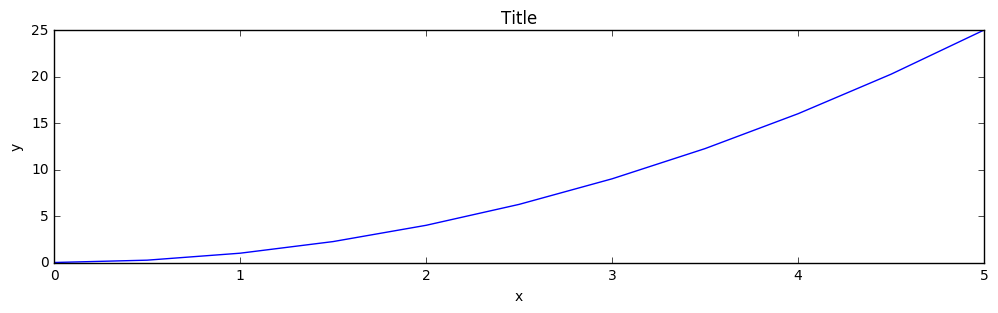

In [15]:
fig, axes = plt.subplots(figsize=(12,3), dpi=100)

axes.plot(x, y, 'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Title');

> This aspects are particularly useful when writing reports, which impose restrictions or require templates ($\TeX$)

---
# Saving figures
---
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [16]:
fig.savefig("filename.pdf")

Here we can also optionally specify the DPI and choose between different output formats:

In [17]:
fig.savefig("filename-dpi100.png", dpi=100)

In [18]:
fig.savefig("filename-dpi1000.png", dpi=1000)

---
# Legends, Labels and Titles
---

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how *decorate* a figure with titles, axis labels, and legends.

### Figure titles

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [19]:
ax.set_title("Title");

### Axis labels

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [20]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

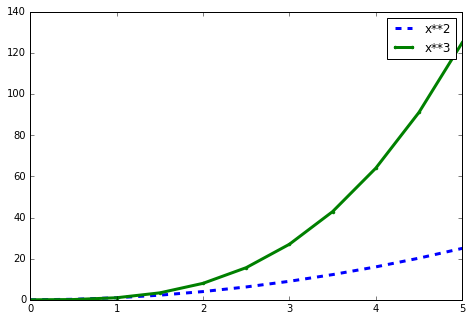

In [21]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, '--', lw=3, label="x**2")
ax.plot(x, x**3, '.-', lw=3, label="x**3")
ax.legend()
plt.show()

**Legends may overlap some of the actual plot!**

The **`legend`** function takes an optional *keyword* argument **`loc`** that can be used to specify where in the figure the legend is to be drawn 
+ The allowed values of **`loc`** are **numerical codes** for the various places the legend can be drawn. 

Some of the most common **`loc`** values are:

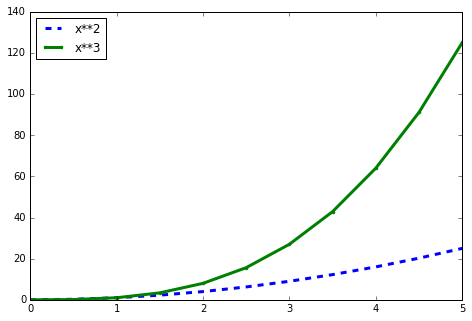

In [22]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the 'best' location
fig

---
# Setting colors, linewidths, linetypes
---

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

### Colors with MatLab-like syntax

We can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported
+ e.g., **`'b.-'`** means a blue line with dots

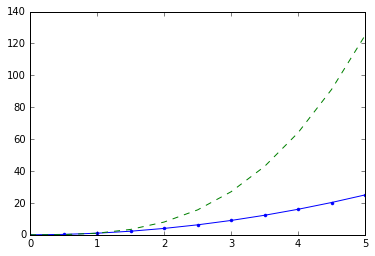

In [23]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Colors with the color= parameter

We can also define **colors** by their names or **RGB hex codes** and  provide an **alpha value** for indicating **opacity**, improving line overlapping

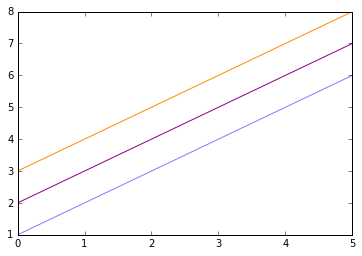

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

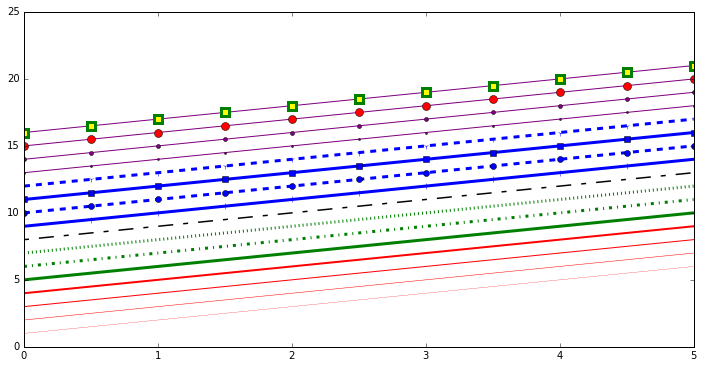

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

---
# Control over axis appearance
---
Controlling axis sizing properties in a Matplotlib figure.

### Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting 'tightly fitted' axes ranges:

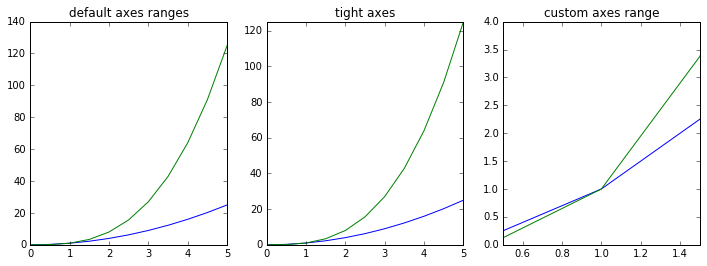

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 4])
axes[2].set_xlim([0.5, 1.5])
axes[2].set_title("custom axes range");

---
# Special Plot Types
---
There are many specialized plots we can create:
+ barplots, histograms, scatter plots, and much more. 

Most of these type of plots we will actually create using **`Seaborn`**, a **Statistical Plotting Library** for Python. 

Here are a few examples of these type of plots:

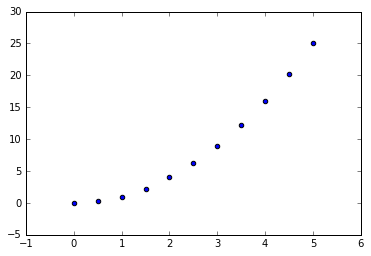

In [27]:
plt.scatter(x,y)

(array([ 14.,   8.,  11.,   2.,  10.,   6.,  10.,  10.,  12.,  17.]),
 array([  13. ,  110.9,  208.8,  306.7,  404.6,  502.5,  600.4,  698.3,
         796.2,  894.1,  992. ]),
 <a list of 10 Patch objects>)

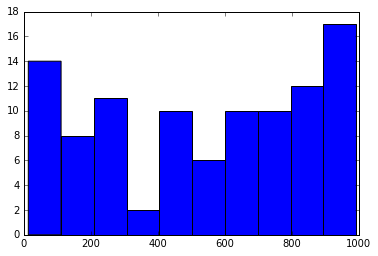

In [28]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

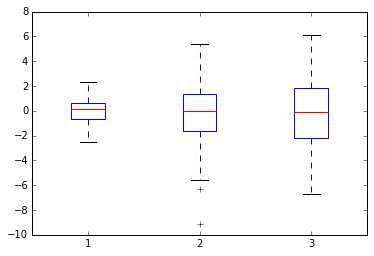

In [29]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

---
# Further readings
---

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.